In [2]:
from scipy import signal
from scipy.io.wavfile import read
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

## Analise de frequencia de .wav files

### Uma voz falando "Python".

In [3]:
pywav = 'sounds/python.wav'
pysr, pysamps = read(pywav)

ipd.Audio(pysamps, rate=pysr)

In [4]:
total_samples = len(pysamps)
time_seconds = total_samples / pysr

time_vector = np.linspace(0, time_seconds, total_samples)
samps_normed = np.interp(pysamps,(pysamps.min(), pysamps.max()),(-1, 1))

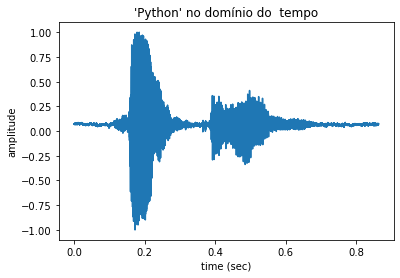

In [5]:
plt.plot(time_vector, samps_normed)
plt.title("'Python' no domínio do  tempo")
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()

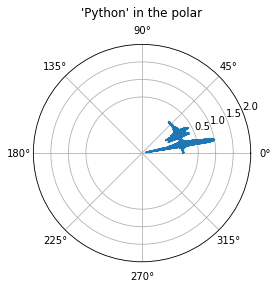

In [13]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(time_vector, samps_normed)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])
ax.grid(True)
ax.set_title("'Python' in the polar", va='bottom')
plt.show()

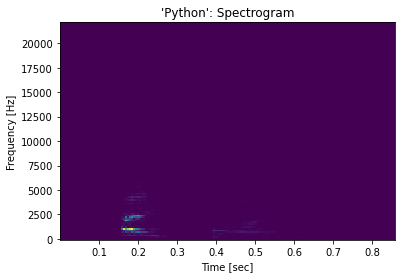

In [14]:
f, t, Sxx = signal.spectrogram(x = samps_normed, fs=pysr)
plt.pcolormesh(t, f, Sxx, shading='auto')
plt.title("'Python': Spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

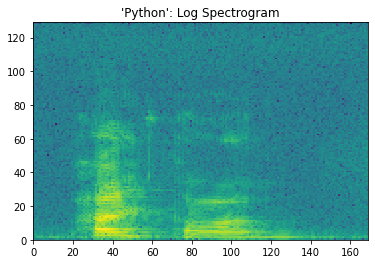

In [15]:
f, t, Sxx = signal.spectrogram(x = samps_normed, fs=pysr)
mag = np.abs(Sxx)
mag_log = np.log(mag)
plt.pcolormesh(mag_log)
plt.title("'Python': Log Spectrogram")
plt.show()

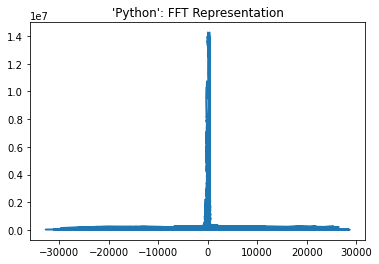

In [22]:
fft_out = fft(pysamps)
plt.title("'Python': FFT Representation")
plt.plot(pysamps, np.abs(fft_out))
plt.show()

## Um beep

In [24]:
samps, sr, time = create_signal(freq=1, amplitude=0.7, sampling_rate=8000, dur_sec=0.25)

total_samples = len(samps)
time_seconds = total_samples / sr

time_vector = np.linspace(0, time_seconds, total_samples)
samps_normed = np.interp(samps,(samps.min(), samps.max()),(-1, 1))

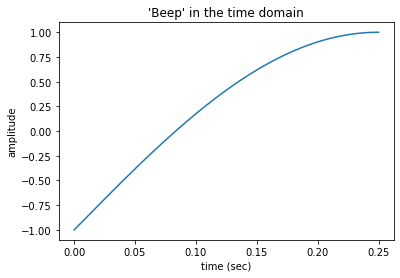

In [25]:
plt.plot(time_vector, samps_normed)
plt.title("'Beep' in the time domain")
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()

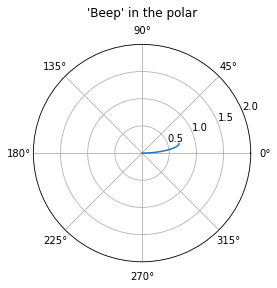

In [26]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(time, samps)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])
ax.grid(True)
ax.set_title("'Beep' in the polar", va='bottom')
plt.show()

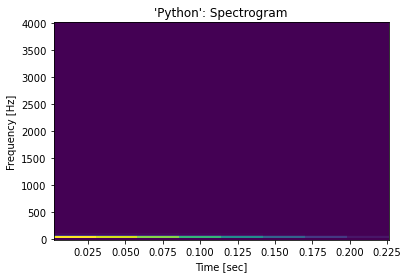

In [27]:
f, t, Sxx = signal.spectrogram(x = samps, fs=sr)
plt.pcolormesh(t, f, Sxx, shading='auto')
plt.title("'Python': Spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

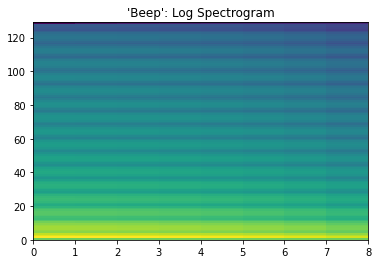

In [28]:
f, t, Sxx = signal.spectrogram(x = samps, fs=sr)
mag = np.abs(Sxx)
mag_log = np.log(mag)
plt.pcolormesh(mag_log)
plt.title("'Beep': Log Spectrogram")
plt.show()

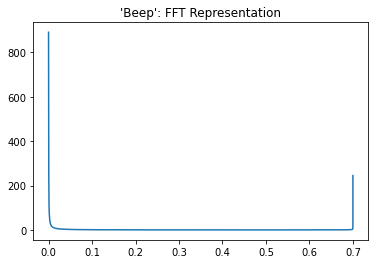

In [29]:
fft_out = fft(samps)
plt.title("'Beep': FFT Representation")
plt.plot(samps, np.abs(fft_out))
plt.show()

In [30]:
## Multiplos beeps

In [11]:
def create_signal(freq=500, amplitude=0.4, sampling_rate=8000, dur_sec=0.25):
    time = np.linspace(0, dur_sec, int(np.floor(dur_sec*sampling_rate)))
    full_circle = 2 * np.pi
    sinewave_samples = amplitude * np.sin((freq*full_circle)*time)
    return sinewave_samples, sampling_rate, time

sampling_rate = 8000

samps1, sr1, time1 = create_signal(freq=1, amplitude=0.7, sampling_rate=sampling_rate, dur_sec=0.25)
samps2, sr2, time2 = create_signal(freq=2, amplitude=0.5, sampling_rate=sampling_rate, dur_sec=0.25)
samps3, sr3, time3 = create_signal(freq=8, amplitude = 0.3, sampling_rate=sampling_rate, dur_sec=0.25)

sin_mult = samps1+samps2+samps3

ipd.Audio(sin_mult, rate=sr3)

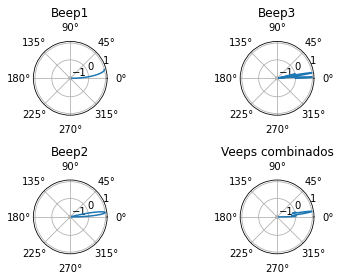

In [31]:
total_samples1 = len(samps1)
time_seconds1 = total_samples / sr1
time_vector1 = np.linspace(0, time_seconds, total_samples)
samps_normed1 = np.interp(samps1,(samps1.min(), samps1.max()),(-1, 1))

total_samples2 = len(samps2)
time_seconds2 = total_samples2 / sr2
time_vector2 = np.linspace(0, time_seconds2, total_samples2)
samps_normed2 = np.interp(samps2,(samps2.min(), samps2.max()),(-1, 1))

total_samples3 = len(samps3)
time_seconds3 = total_samples3 / sr3
time_vector3 = np.linspace(0, time_seconds3, total_samples3)
samps_normed3 = np.interp(samps3,(samps3.min(), samps3.max()),(-1, 1))

sin_mult = samps1+samps2+samps3
total_samples4 = len(sin_mult)
time_seconds4 = total_samples4 / ((sr1 + sr2 + sr3) / 3)
time_vector4 = np.linspace(0, time_seconds4, total_samples4)
samps_normed4 = np.interp(sin_mult,(sin_mult.min(), sin_mult.max()),(-1, 1))

fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection='polar'))
axs[0, 0].plot(time_vector1, samps_normed1)
axs[0, 0].set_title("Beep1")
axs[1, 0].plot(time_vector2, samps_normed2)
axs[1, 0].set_title("Beep2")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(time_vector3, samps_normed3)
axs[0, 1].set_title("Beep3")
axs[1, 1].plot(time_vector4, samps_normed4)
axs[1, 1].set_title("Veeps combinados")
fig.tight_layout()

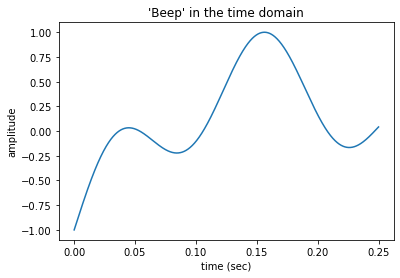

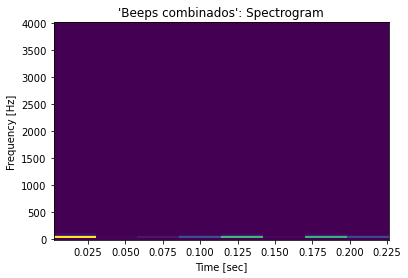

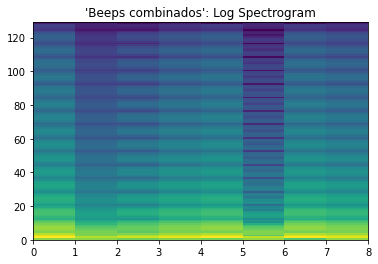

In [267]:
plt.plot(time_vector, samps_normed4)
plt.title("'Beep' in the time domain")
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()


f, t, Sxx = signal.spectrogram(x = samps_normed4, fs=sampling_rate)
plt.pcolormesh(t, f, Sxx, shading='auto')
plt.title("'Beeps combinados': Spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

f, t, Sxx = signal.spectrogram(x = samps_normed4, fs=sampling_rate)
mag = np.abs(Sxx)
mag_log = np.log(mag)
plt.pcolormesh(mag_log)
plt.title("'Beeps combinados': Log Spectrogram")
plt.show()

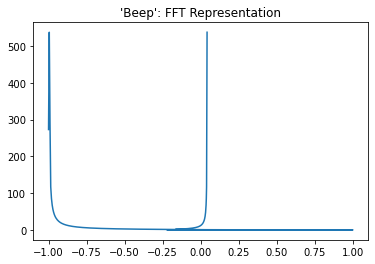

In [265]:
fft_out = fft(samps_normed4)
plt.title("'Beep': FFT Representation")
plt.plot(samps_normed4, np.abs(fft_out))
plt.show()